# Import Libraries

In [1]:
import ccxt
import pandas as pd
import time
# from songline import Sendline as sl
import matplotlib.pyplot as plt
%matplotlib inline

# Configuration

In [2]:
#API
APIKey = ''
Secret = ''


#Products
Pair = 'XRPBULL/USD'
TF = '1h'
MAPeriod = 24 * 7 

# Connection

In [3]:
FTX = ccxt.ftx({
    'apiKey': APIKey,
    'secret': Secret,
    'enableRateLimit' : True
})

# Define Function

In [4]:
# FTX.fetch_ohlcv(symbol = Pair, timeframe = TF)

In [5]:
def GetHistPrice():
    Data = FTX.fetch_ohlcv(symbol = Pair, timeframe = TF)
    Columns = ['ID', 'Open', 'High', 'Low', 'Close', 'Volume']
    try:
        price = pd.DataFrame(Data,
                            columns = Columns)
        price['Range'] = price['High'] - price['Low']
        price['PercentRange'] = (price['Range'] / price['Close']) * 100
        price['MeanRange'] = price['PercentRange'].rolling(window=MAPeriod).mean()
    except ccxt.NetworkError as e:
        print(FTX.id, 'fetch_ohlcv failed due to a network error:', str(e))
        time.sleep(15)
        price = pd.DataFrame(Data,
                            columns = Columns)
        price['Range'] = price['High'] - price['Low']
        price['PercentRange'] = (price['Range'] / price['Close']) * 100
        price['MeanRange'] = price['PercentRange'].rolling(window=MAPeriod).mean()
    except ccxt.ExchangeError as e:
        print(FTX.id, 'fetch_ohlcv failed due to exchange error:', str(e))
        time.sleep(15)
        price = pd.DataFrame(Data,
                            columns = Columns)
        price['Range'] = price['High'] - price['Low']
        price['PercentRange'] = (price['Range'] / price['Close']) * 100
        price['MeanRange'] = price['PercentRange'].rolling(window=MAPeriod).mean()
    except Exception as e:
        print(FTX.id, 'fetch_ohlcv failed with:', str(e))
        time.sleep(15)
        price = pd.DataFrame(Data,
                            columns = Columns)
        price['Range'] = price['High'] - price['Low']
        price['PercentRange'] = (price['Range'] / price['Close']) * 100
        price['MeanRange'] = price['PercentRange'].rolling(window=MAPeriod).mean()
        
    
    return price

# Data Pulling

In [6]:
GetHistPrice()

,ID,Open,High,Low,Close,Volume,Range,PercentRange,MeanRange
0,1608670800000,17.4400,17.9400,11.2500,13.1350,280991.517645,6.6900,50.932623,NaN
1,1608674400000,13.1350,14.6700,12.4550,14.1000,182366.262550,2.2150,15.709220,NaN
2,1608678000000,14.1000,15.4300,13.5350,14.7800,223659.036900,1.8950,12.821380,NaN
3,1608681600000,14.7800,15.0000,12.4200,13.3250,204140.024050,2.5800,19.362101,NaN
4,1608685200000,13.3250,13.4500,10.4300,11.4800,169774.075300,3.0200,26.306620,NaN
...,...,...,...,...,...,...,...,...,...
1496,1614056400000,1.1255,1.1255,0.8880,1.0120,233408.682100,0.2375,23.468379,8.927600
1497,1614060000000,1.0120,1.0885,0.9800,0.9930,151235.093150,0.1085,10.926485,8.930151
1498,1614063600000,0.9930,1.0500,0.9570,0.9730,100416.339050,0.0930,9.558068,8.952285
1499,1614067200000,0.9730,0.9920,0.4385,0.4385,221205.039900,0.5535,126.225770,9.676248


In [7]:
# len(GetHistPrice())

# Visualization

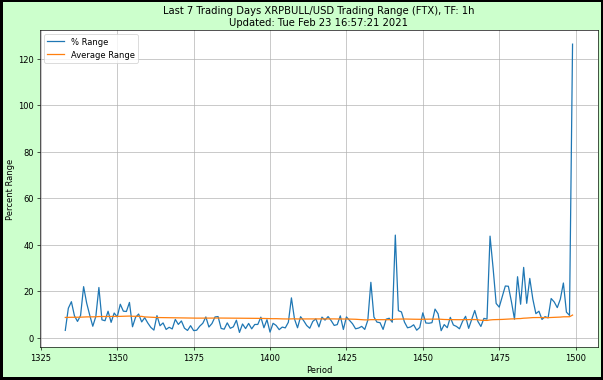

In [8]:
plt.figure(figsize=(12,7),
           dpi = 60,
           edgecolor = '#000000',
           linewidth = 5,
           facecolor = '#CCFFCC')

plt.plot(GetHistPrice()['PercentRange'][-MAPeriod:-1],
        label = '% Range')
plt.plot(GetHistPrice()['MeanRange'][-MAPeriod:-1],
        label = 'Average Range')

plt.xlabel('Period')
plt.ylabel('Percent Range')
plt.title(f'Last 7 Trading Days {Pair} Trading Range (FTX), TF: 1h\nUpdated: {time.ctime()}')

plt.grid()
plt.legend()
plt.show()